## Group Project (#15)
#### Members: 
- Bhoomika Yadav
- Yubin Kim
- Karen Rianika Tanuwijaya
- Yasin Mir 

## Introduction 



A predictive question is where a certain class or a specific numerical value of a future observation is estimated using data that already exists. To predict the usage of a video game server, specifically to predict a player’s hours playing the game, we are going to use a method called regression using the k-nearest neighbors model. Regression is a method used to predict a quantitative value for our future observations. Since we are using the k-nearest neighbors model, we take the average number of neighbors close to each value of the predictor and make a curve that fits the total observations. This curve contains the average location of all the points close to the predictor value thus we can predict the numerical value of our future observation. 


#### Question 
The question we chose to answer is: Which kinds of players are most likely to contribute a large amount of data so that so that we can target those players in our recruiting efforts. 
The specific question we are trying to explore and answer is: Can the `experience` of the players be used to predict the total play time `played_hours` of the player in the players dataset? 

### Data Description of the players.csv dataset 
To address this question, the players.csv dataset was used. This dataset was selected as it contains the necessay information required to answer the question, that is it provides data on each player's experience level and the total number of hours they have spent playing the game, both of which are essential to make a prediction on our question. 

##### Overview of the variables 
|Name        |Type                |Description| 
|:--------   |:---------          |:----------|
|`experience`  |Character (Categorical)| Player's skill level (Amateur, Beginner, Regular, Veteran and Pro)|         
|`subscribe`   |Logical (a boolean)| Whether or not the player has a subscription| 
|`hashedEmail` |Character| Unique identifier for each player |
|`played_hours`|Double| Total hours spent on the server by player |
|`name`        |Character| Player's name |
|`gender`     |Character (Categorical)|  Player's gender (7 categories)|
|`Age`         |Double| Player's age (8 - 50 years)|

# 
- Most players are `Amateur`
- Most players have the subscription for the game
- Most player are `Male`
- Average play time: around 5.85hrs.
- Average age: 20-21 years old. 

### Analysis 

In [1]:
#Loading the libraries 
library(tidyverse) 
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Loading the players.csv data 
players_data <- read_csv("https://raw.githubusercontent.com/bhxxmika/group_project_files/refs/heads/main/players.csv") 
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


### Analysing the relationship between `experience` and `played_hours` 

!!!! HAVE TO ADD A FIGURE NUMBER 

experience,played_hours_mean
<chr>,<dbl>
Amateur,10.831429
Beginner,2.300000
Pro,3.309091
Regular,32.775000
Veteran,1.196154


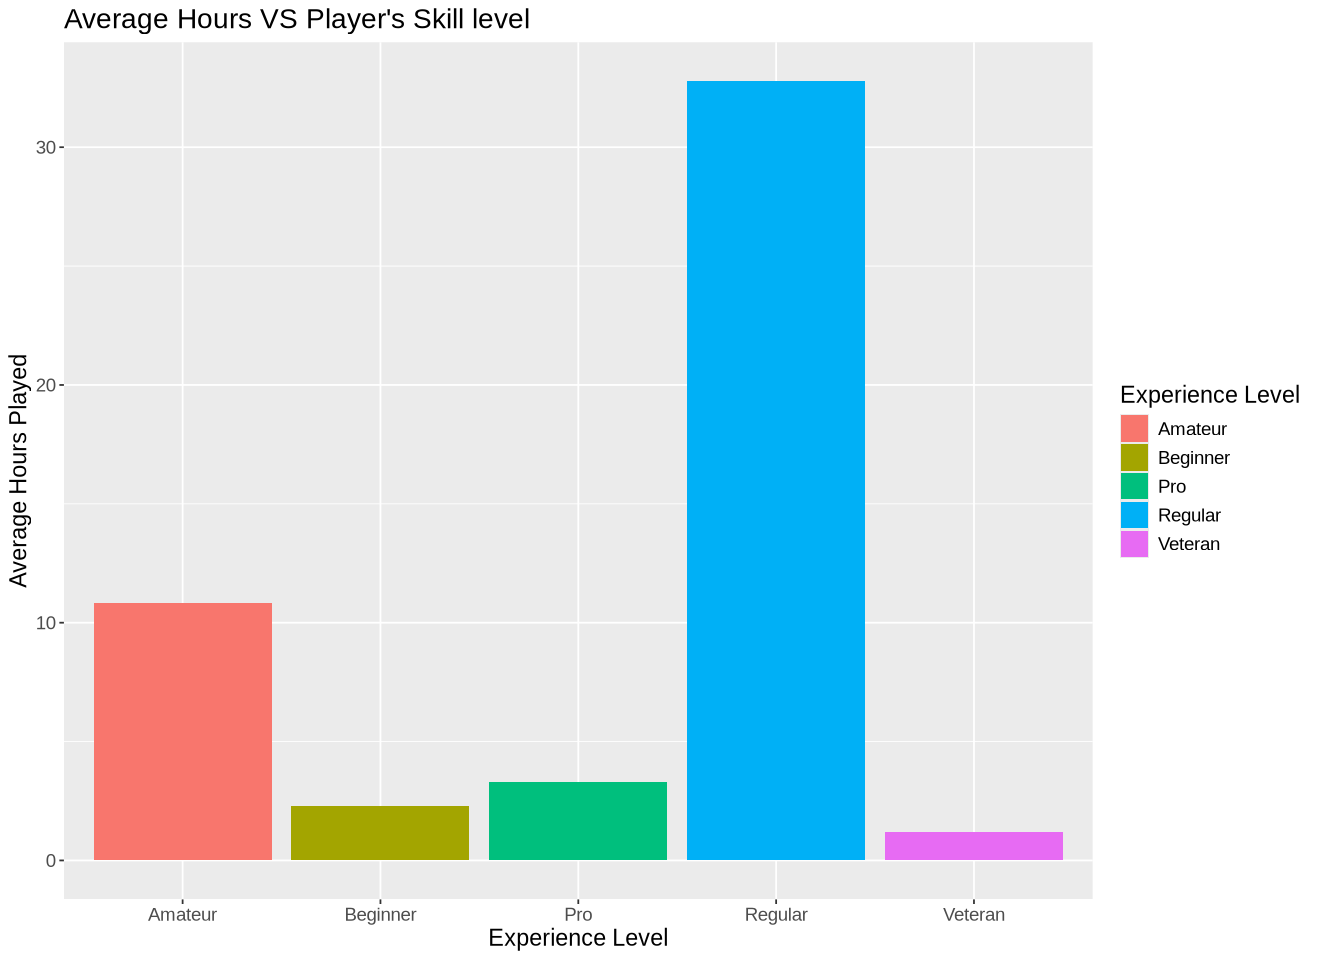

In [3]:

#setting the height and width for the graph 
options(repr.plot.width = 11, repr.plot.height = 8)

#grouping the dataset by experience 
players_by_lvl <- players_data |> 
                filter(played_hours > 0) |>
                group_by(experience) |>
                summarize(played_hours_mean = mean(played_hours)) 
players_by_lvl 


# Plotting the relationhip between `experience` and `played_hours`
experience_vs_hours <- players_by_lvl |> 
                    ggplot(aes(x = experience, y = played_hours_mean, fill = experience)) + 
                    geom_bar(stat = "identity") + 
                    labs(x = "Experience Level", y = "Average Hours Played", title = "Average Hours VS Player's Skill level", fill = "Experience Level") + 
                    theme(text = element_text(size = 14)) 
                    
experience_vs_hours 


### PUT DOWN WHAT WE INFER/ ANALYZE FROM THE GRAPH !!!

In [6]:
# Wrangling 
players_tidy <- players_data |>  
                select(experience, played_hours) |> 
                filter(played_hours > 0) |>
                mutate(experience = fct_recode(experience, "1" = "Amateur", "2" = "Beginner", "3" = "Regular", "4" = "Veteran", "5" = "Pro")) |> 
                mutate(experience = as.numeric(experience)) 
            
head(players_tidy) 
tail(players_tidy)
players_split <- players_tidy |> 
                    initial_split(prop = 0.75, strata = played_hours) 
players_training <- training(players_split) 
players_testing <- testing(players_split) 
players_training 
players_testing 

experience,played_hours
<dbl>,<dbl>
3,30.3
5,3.8
1,0.7
4,0.1
1,0.1
5,1.6


experience,played_hours
<dbl>,<dbl>
3,1.7
4,0.1
5,0.1
5,0.3
1,2.3
3,0.2


experience,played_hours
<dbl>,<dbl>
4,0.1
1,0.1
1,0.2
1,0.5
4,0.3
1,0.1


experience,played_hours
<dbl>,<dbl>
5,3.8
5,1.6
5,0.1
5,0.1
5,0.1
5,12.5


In [5]:
#knn regression 
set.seed(2000) 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
            set_engine("kknn") |> 
            set_mode("regression") 

knn_recipe <- recipe(played_hours ~ experience, data = players_training) |> 
                step_scale(all_predictors()) |> 
                step_center(all_predictors()) 
knn_vfold <- vfold_cv(players_training, v = 5, strata = played_hours) 

knn_workflow <- workflow() |> 
             add_recipe(knn_recipe) |> 
             add_model(knn_spec) 
k_values <- tibble(neighbors = seq(from = 1, to = 50, by = 1)) 

knn_results <- knn_workflow |> 
                tune_grid(resamples = knn_vfold, grid = k_values) |> 
                collect_metrics() 

knn_min <- knn_results |> 
            filter(.metric == "rmse") |> 
            filter(mean == min(mean)) 
knn_min #FOUND THAT 9 IS THE BEST K VAL 
knn_min_val <- knn_min |> 
                pull(neighbors) 
knn_min_val

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = knn_min_val) |> 
                set_engine("kknn") |> 
                set_mode("regression") 
players_fit <- workflow() |> 
                add_recipe(knn_recipe) |> 
                add_model(players_spec) |> 
                fit(data = players_training) 
knn_almost_rmspe <- players_fit |> 
                        predict(players_testing) |>
                        bind_cols(players_testing) |> 
                        metrics(truth = played_hours, estimate = .pred) 
knn_almost_rmspe
knn_rmspe <- knn_almost_rmspe |> 
                filter(.metric == "rmse") |> 
                select(.estimate) |> 
                pull() 
knn_rmspe 


→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,31.64893,5,9.086056,Preprocessor1_Model08


[1] 8

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,41.51661279
rsq,standard,0.01773712
mae,standard,9.46982759


[1] 41.51661